In [142]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

In [143]:
nb_classes = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [144]:
#Flatten the images for the Fully-Connected Networks
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [145]:
input_size = 784
hidden_size = 32
output_size = 784

In [146]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu', activity_regularizer=regularizers.l1(10e-10))(x)
r = Dense(output_size, activation='relu')(h)

autoencoder = Model(x,r)
autoencoder.compile(optimizer='adam', loss='mse')


In [147]:
print(autoencoder.summary())

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_30 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
None


In [148]:
epochs = 50
batch_size = 1000

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 12us/step - loss: 0.0677 - val_loss: 0.0457
Epoch 2/50
60000/60000 [==============================] - 1s 9us/step - loss: 0.0369 - val_loss: 0.0300
Epoch 3/50
60000/60000 [==============================] - 1s 9us/step - loss: 0.0268 - val_loss: 0.0234
Epoch 4/50
60000/60000 [==============================] - 1s 9us/step - loss: 0.0219 - val_loss: 0.0199
Epoch 5/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.0192 - val_loss: 0.0179
Epoch 6/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.0177 - val_loss: 0.0167
Epoch 7/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.0167 - val_loss: 0.0160
Epoch 8/50
60000/60000 [==============================] - 1s 9us/step - loss: 0.0161 - val_loss: 0.0155
Epoch 9/50
60000/60000 [==============================] - 1s 9us/step - loss: 0.0157 - val_loss: 0.0151
Epoch 10/5

In [149]:
decoded_imgs = autoencoder.predict(X_test)

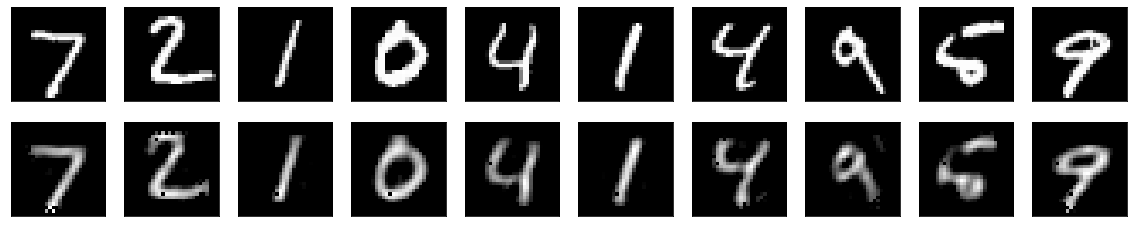

In [150]:
# Display Original and reconstructed images
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

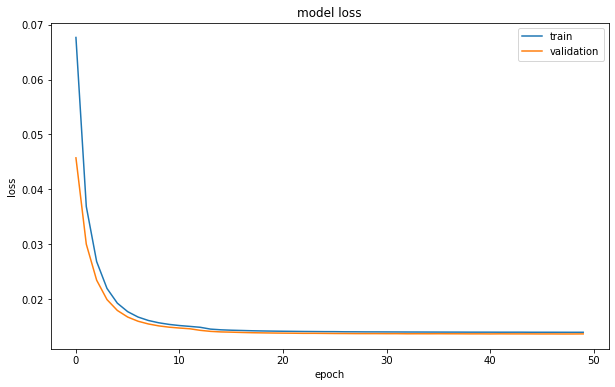

In [151]:
fig=plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()